In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
df=pd.read_csv('threats.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,Threat
0,-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,...,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07,0
1,0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,...,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22,0
2,0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,...,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37,0
3,-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,...,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18,0
4,-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,...,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07,0


In [6]:
df.dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
           ...   
84        float64
85        float64
86        float64
87        float64
Threat      int64
Length: 89, dtype: object

In [7]:
X=df.drop('Threat',axis=1).copy()
X.head()
y=df['Threat'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Threat, dtype: int64

In [8]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,...,-1.82,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07
1,0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,...,-0.30,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22
2,0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,...,-0.72,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37
3,-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,...,0.29,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18
4,-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,...,-0.09,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07


[Text(0.6140457736864091, 0.9927536231884058, '0 <= 0.005\ngini = 0.004\nsamples = 750000\nvalue = [748578, 1422]\nclass = No Threat'),
 Text(0.3210381188401519, 0.9782608695652174, '64 <= 5.175\ngini = 0.003\nsamples = 653495\nvalue = [652461, 1034]\nclass = No Threat'),
 Text(0.26487509663309916, 0.9637681159420289, '8 <= -0.315\ngini = 0.003\nsamples = 653493\nvalue = [652460, 1033]\nclass = No Threat'),
 Text(0.1540785653625626, 0.9492753623188406, '80 <= 3.37\ngini = 0.006\nsamples = 128689\nvalue = [128321, 368]\nclass = No Threat'),
 Text(0.14287670506444705, 0.9347826086956522, '51 <= 5.475\ngini = 0.006\nsamples = 128682\nvalue = [128316, 366]\nclass = No Threat'),
 Text(0.12200249761178494, 0.9202898550724637, '78 <= 3.35\ngini = 0.006\nsamples = 128680\nvalue = [128315, 365]\nclass = No Threat'),
 Text(0.0817835958500297, 0.9057971014492754, '53 <= -1.825\ngini = 0.006\nsamples = 128678\nvalue = [128314, 364]\nclass = No Threat'),
 Text(0.0028753054700881723, 0.8913043478260

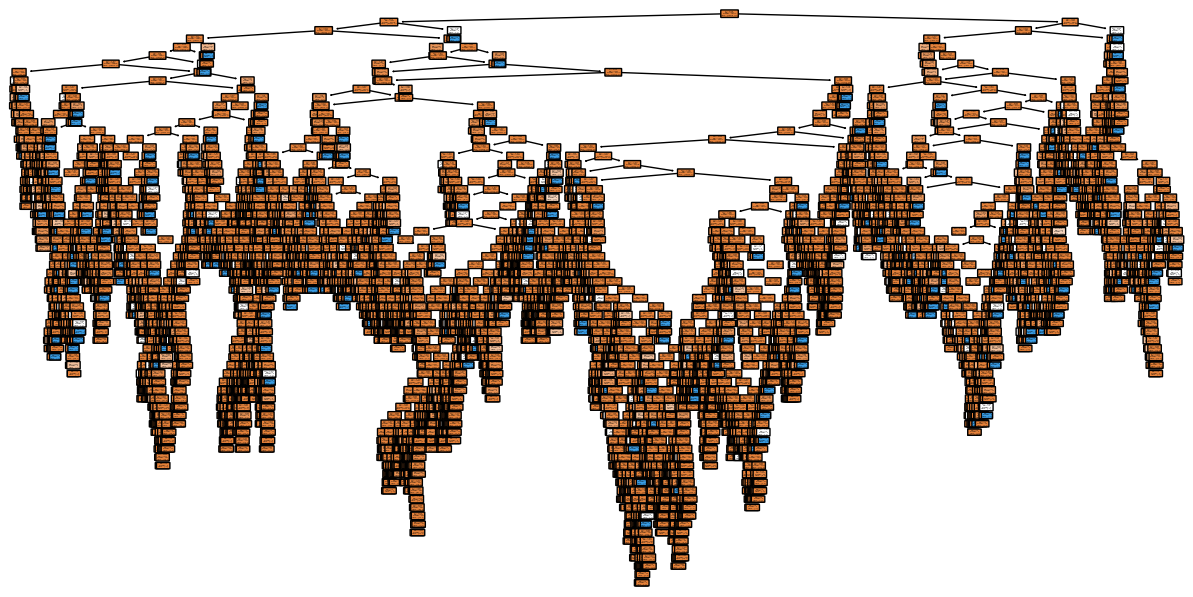

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
clf_dt=DecisionTreeClassifier(random_state=0)
clf_dt=clf_dt.fit(X_train,y_train)
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,rounded=True,class_names=["No Threat","Threat"],feature_names=X.columns)

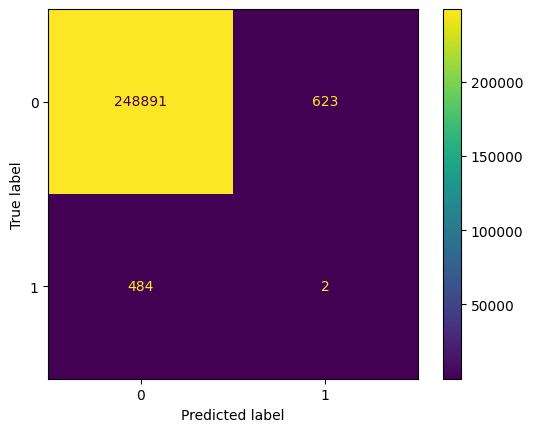

In [25]:
predictions=clf_dt.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_dt.classes_)
disp.plot()
plt.show()

In [26]:
precision=248891/(248891+623)
recall=248891/(248891+484)
F1_score=(2*recall*precision)/(recall+precision)

In [27]:
F1_score

0.9977810695365102